# COVID-19 疫情估算

## 載入數據

我們將使用由[約翰霍普金斯大學](https://jhu.edu/)的[系統科學與工程中心](https://systems.jhu.edu/) (CSSE) 提供的 COVID-19 感染者數據。數據集可在[這個 GitHub 資料庫](https://github.com/CSSEGISandData/COVID-19)中找到。


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

我們可以使用 `pd.read_csv` 從 GitHub 直接加載最新的數據。如果由於某些原因數據不可用，您可以隨時使用 `data` 文件夾中本地可用的副本——只需取消註釋下面定義 `base_url` 的那一行：


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

我們可以看到，表格的每一行定義了每個國家和/或省份的感染人數，列則對應日期。類似的表格可以用於加載其他數據，例如康復人數和死亡人數。


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## 理解數據

從上表來看，`Province/State` 欄位的角色並不明確。我們來看看 `Province/State` 欄位中存在的不同值：


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## 資料預處理

我們不需要將國家進一步細分到各個地區，因此我們首先會移除這些細分，並將所有地區的資訊合併起來，以獲取整個國家的資訊。這可以使用 `groupby` 來完成：


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

您可以看到，由於使用了 `groupby`，所有的 DataFrame 現在都以國家/地區為索引。因此，我們可以使用 `.loc` 來訪問特定國家的數據：


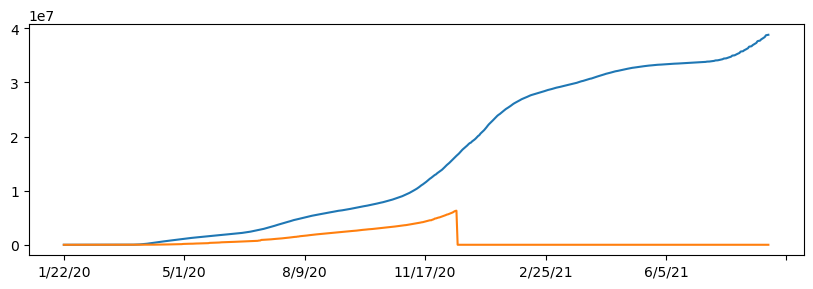

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **注意** 我們使用 `[2:]` 來移除序列中包含國家地理位置的前兩個元素。我們也可以完全刪除這兩列：


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## 調查數據

現在讓我們轉向調查一個特定的國家。讓我們建立一個框架，包含按日期索引的感染數據：


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

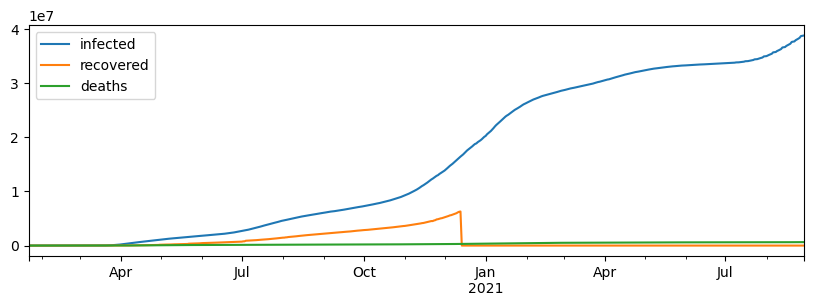

In [134]:
df.plot()
plt.show()

現在讓我們計算每天新增感染者的人數。這將使我們能夠看到疫情進展的速度。最簡單的方法是使用 `diff`：


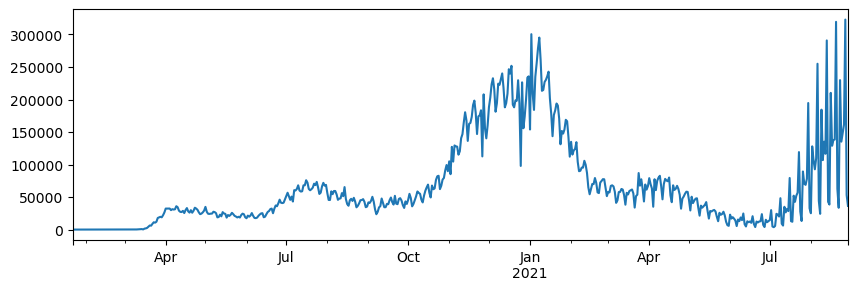

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

我們可以看到數據有很大的波動。我們來更仔細地看看其中一個月份：


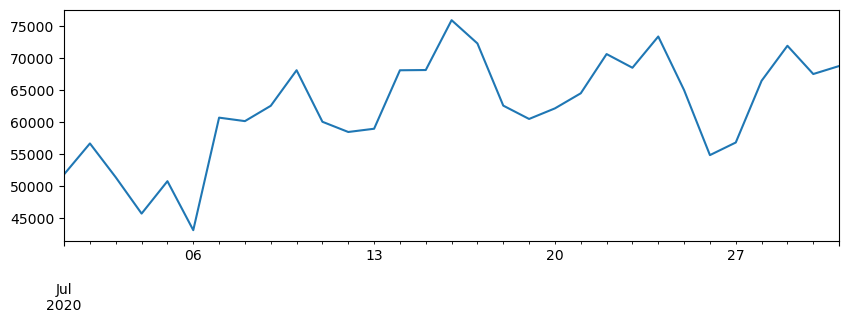

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

看起來數據明顯存在每週波動。因為我們希望能夠看到趨勢，所以透過計算移動平均值（即對於每一天，我們將計算前幾天的平均值）來平滑曲線是有意義的：


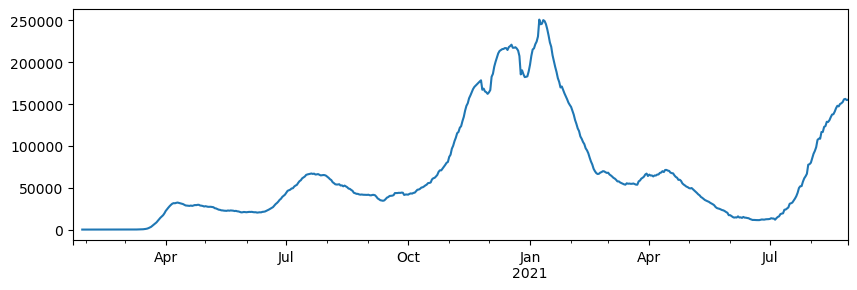

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

為了能夠比較多個國家，我們可能需要考慮該國家的人口，並比較感染個體相對於該國家人口的百分比。為了獲取國家的人口數據，讓我們載入國家的數據集：


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

因為此數據集包含國家和省份的資訊，要獲取整個國家的總人口，我們需要稍微動點腦筋：


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

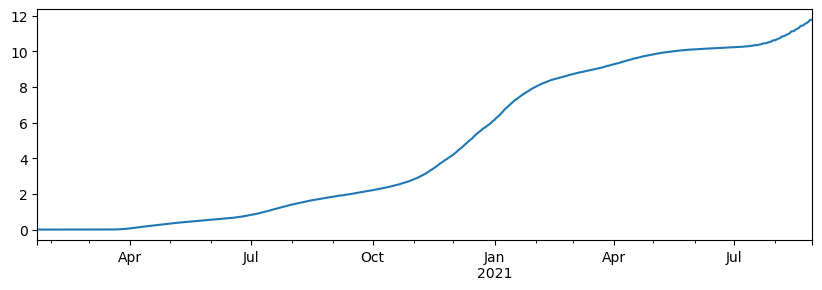

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## 計算 $R_t$

為了了解疾病的傳染性，我們會查看**基本傳染數** $R_0$，它表示一位感染者平均會傳染給多少人。如果 $R_0$ 大於 1，疫情可能會擴散。

$R_0$ 是疾病本身的特性，並未考慮人們可能採取的一些防疫措施來減緩疫情。在疫情進展期間，我們可以估算任意時間點 $t$ 的傳染數 $R_t$。研究顯示，這個數值可以通過取 8 天的窗口來粗略估算，公式如下：  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
其中 $I_t$ 是第 $t$ 天新增感染者的數量。

現在讓我們來計算疫情數據中的 $R_t$。為了做到這一點，我們將取 8 天的 `ninfected` 數值作為滾動窗口，並應用上述公式來計算比率：


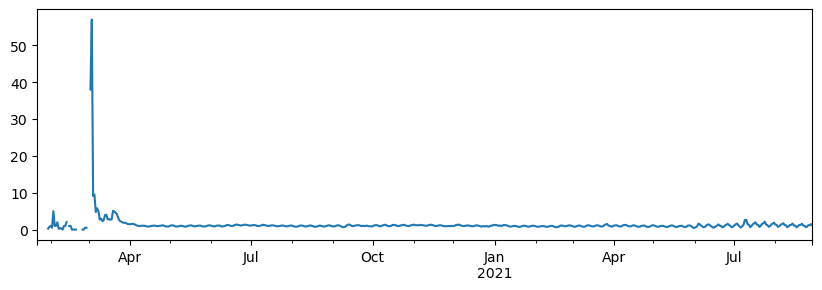

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

你可以看到圖表中有一些空隙。這些空隙可能是由於數據集中存在 `NaN` 或 `inf` 值所導致的。`inf` 可能是因為除以 0 而產生的，而 `NaN` 則可能表示缺失數據，或者沒有可用的數據來計算結果（例如在我們圖表的最開始部分，寬度為 8 的滾動窗口尚未可用）。為了讓圖表看起來更美觀，我們需要使用 `replace` 和 `fillna` 函數來填補這些值。

接下來，我們來看看疫情初期的情況。我們還會限制 y 軸的值，只顯示小於 6 的數值，以便更清楚地觀察，並在 y=1 的位置繪製一條水平線。


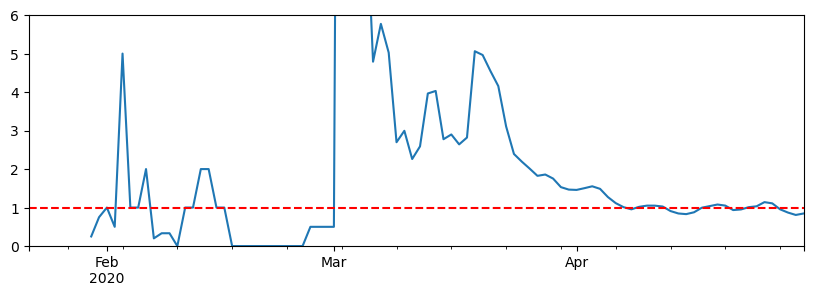

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

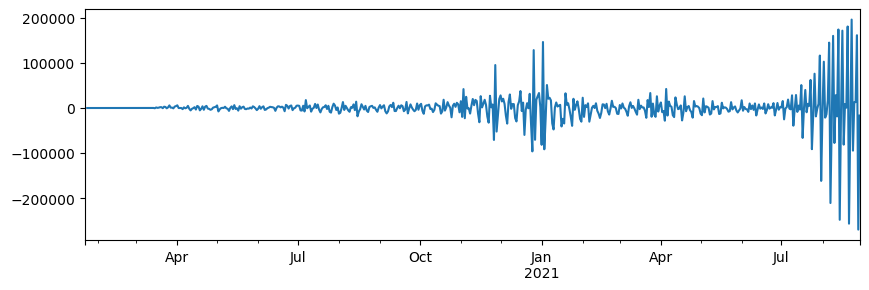

In [143]:
df['ninfected'].diff().plot()
plt.show()

鑑於報告導致數據出現大量波動，通過運行移動平均來平滑曲線以獲得整體情況是有道理的。我們再來關注疫情的最初幾個月：


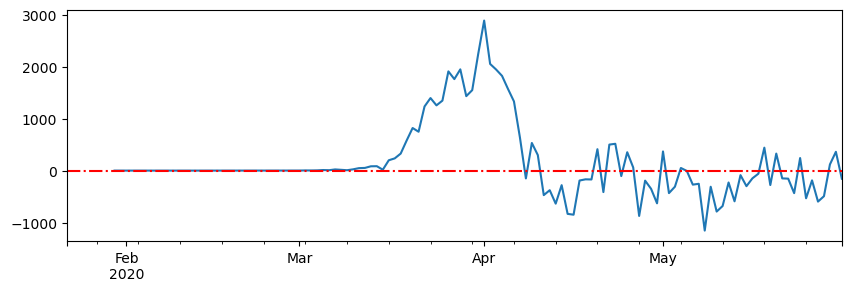

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## 挑戰

現在是時候讓你更深入地探索程式碼和數據了！以下是一些你可以嘗試的建議：
* 查看疫情在不同國家的擴散情況。
* 在一個圖表上繪製多個國家的 $R_t$ 圖表進行比較，或者將多個圖表並排展示。
* 查看死亡人數和康復人數與感染病例數之間的關聯。
* 嘗試找出典型疾病的持續時間，方法是通過視覺上比較感染率和死亡率，並尋找一些異常情況。你可能需要查看不同國家的數據來得出結論。
* 計算致死率以及其隨時間的變化。你可能需要考慮疾病的持續天數，將一個時間序列進行移位後再進行計算。


## 參考資料

您可以在以下出版物中進一步研究 COVID 疫情的傳播：
* [用於 COVID 疫情期間 Rt 估算的滑動 SIR 模型](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/)，[Dmitry Soshnikov](http://soshnikov.com) 的部落格文章
* T.Petrova, D.Soshnikov, A.Grunin. [全球 COVID-19 爆發的時間依賴性再生數估算](https://www.preprints.org/manuscript/202006.0289/v1)。*Preprints* **2020**，2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [上述論文的 GitHub 程式碼](https://github.com/shwars/SlidingSIR)



---

**免責聲明**：  
本文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。應以原始語言的文件作為權威來源。對於關鍵資訊，建議尋求專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或誤釋不承擔責任。
